## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

**<font color='teal'> Apply the describe function to the data.</font>**

In [3]:
diabetes_data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [4]:
diabetes_data.Glucose = diabetes_data.Glucose.replace(0, np.mean(diabetes_data.Glucose))
diabetes_data.BloodPressure = diabetes_data.BloodPressure.replace(0, np.mean(diabetes_data.BloodPressure))
diabetes_data.SkinThickness = diabetes_data.SkinThickness.replace(0, np.mean(diabetes_data.SkinThickness))
diabetes_data.Insulin = diabetes_data.Insulin.replace(0, np.mean(diabetes_data.Insulin))
diabetes_data.BMI = diabetes_data.BMI.replace(0, np.mean(diabetes_data.BMI))
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


**<font color='teal'> Plot histograms of each column. </font>**

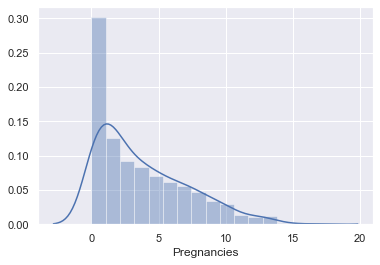

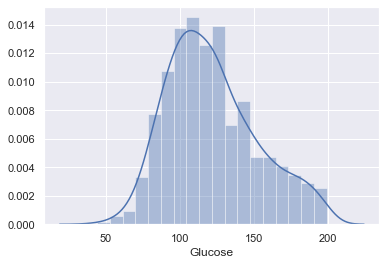

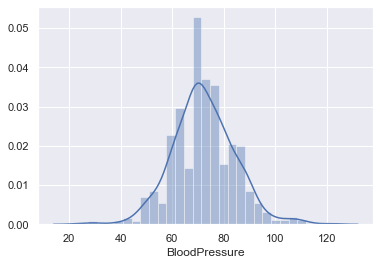

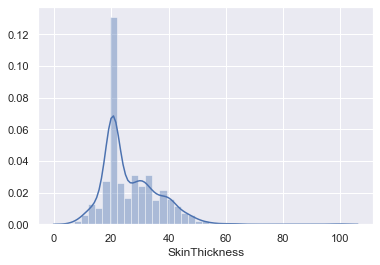

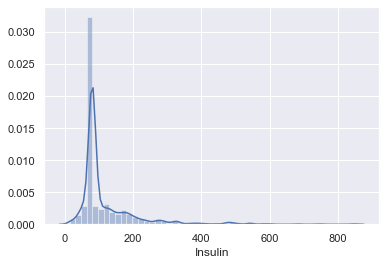

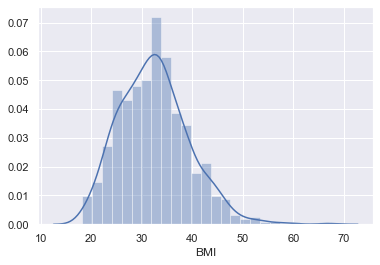

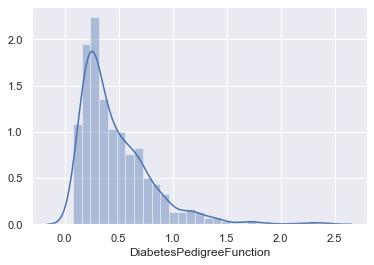

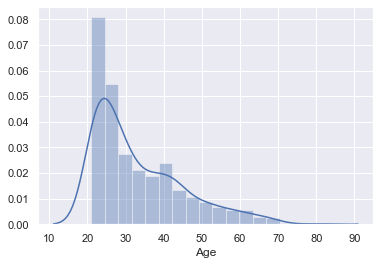

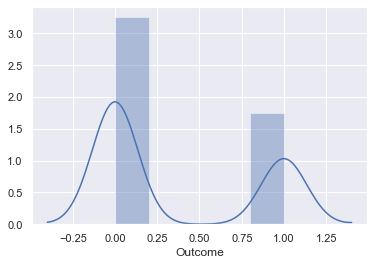

In [5]:
for column in diabetes_data.columns:

    sns.distplot(diabetes_data[column])
    plt.show()

#### Replace the zeros with mean and median values.

In [6]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

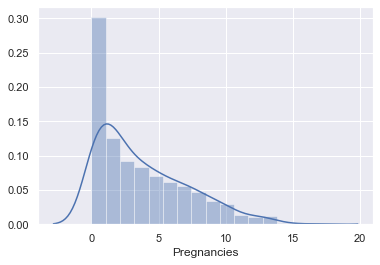

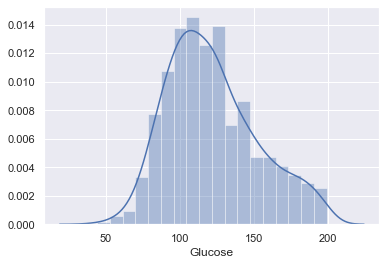

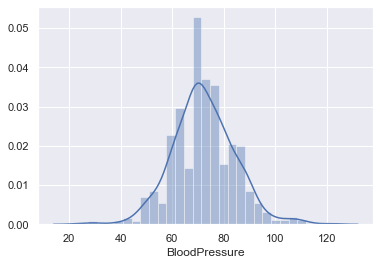

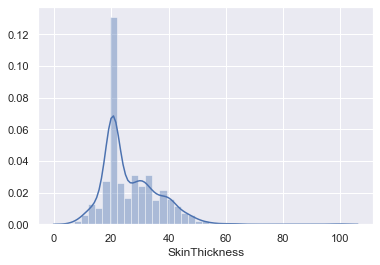

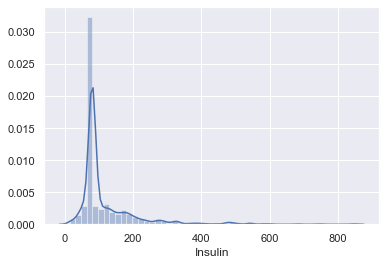

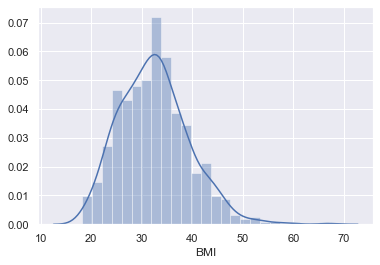

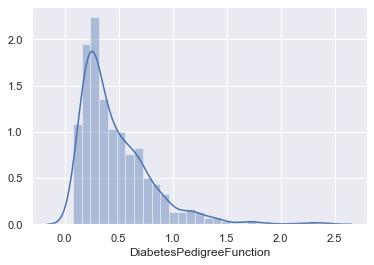

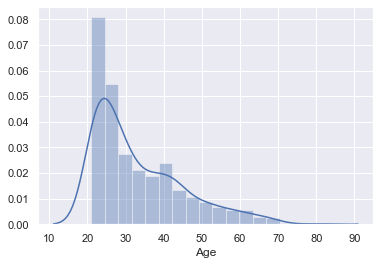

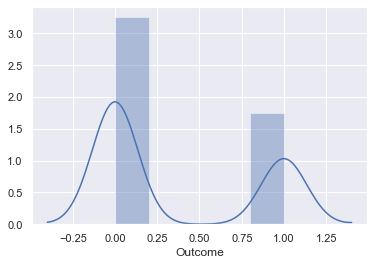

In [7]:
for column in diabetes_data.columns:

    sns.distplot(diabetes_data[column])
    plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


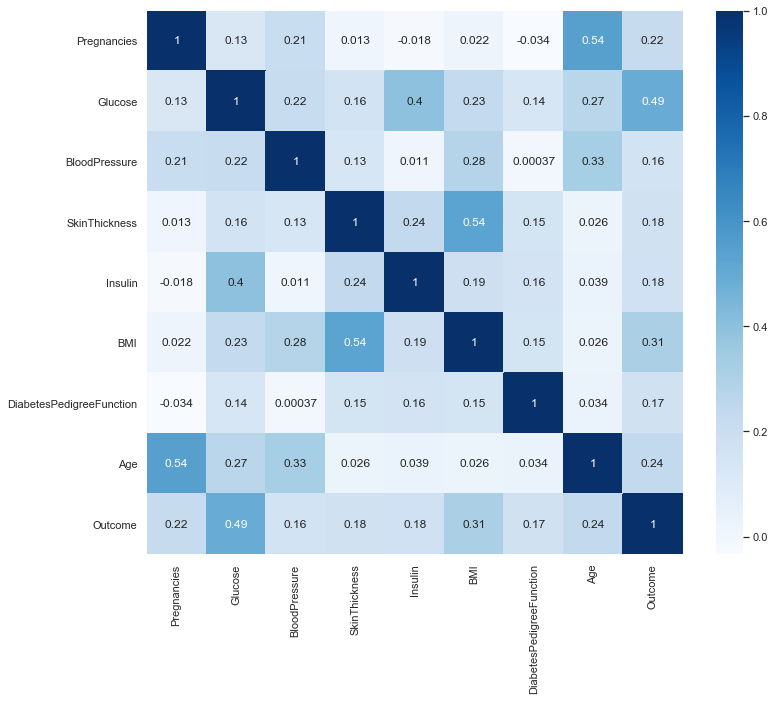

In [8]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(diabetes_data)
df_scaled= pd.DataFrame(df_scaled, columns=diabetes_data.columns)

df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995,1.365896
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672,-0.732120
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584,1.365896
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.222711,0.659428,0.065376,-0.908682,2.532136,-0.732120
764,-0.547919,0.010468,-0.186224,0.040885,-0.417768,0.632988,-0.398282,-0.531023,-0.732120
765,0.342981,-0.022409,-0.021044,-0.374700,-0.071599,-0.909751,-0.685193,-0.275760,-0.732120
766,-0.844885,0.141977,-1.012121,-0.630654,-0.417768,-0.342140,-0.371101,1.170732,1.365896


**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [10]:
y = diabetes_data.Outcome

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [12]:
from sklearn.model_selection import train_test_split
X=df_scaled.drop(columns=['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [13]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [14]:
print(train_scores)
print(test_scores)

[1.0, 0.845437616387337, 0.8584729981378026, 0.8175046554934823, 0.8305400372439479, 0.7951582867783985, 0.8026070763500931, 0.8026070763500931, 0.8100558659217877]
[0.6883116883116883, 0.696969696969697, 0.7316017316017316, 0.696969696969697, 0.7359307359307359, 0.7359307359307359, 0.7532467532467533, 0.7359307359307359, 0.7445887445887446]


**<font color='teal'> Identify the number of neighbors between 1-15 that resulted in the max score in the training dataset. </font>**

In [28]:
train_scores = []
test_scores = []
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
print(train_scores)
#1 is the best value


[1.0, 0.845437616387337, 0.8584729981378026, 0.8175046554934823, 0.8305400372439479, 0.7951582867783985, 0.8026070763500931, 0.8026070763500931, 0.8100558659217877, 0.8044692737430168, 0.8100558659217877, 0.8063314711359404, 0.8119180633147114, 0.8026070763500931]


**<font color='teal'> Identify the number of neighbors between 1-15 that resulted in the max score in the testing dataset. </font>**

In [29]:
print(test_scores)
#7 is the best value

[0.6883116883116883, 0.696969696969697, 0.7316017316017316, 0.696969696969697, 0.7359307359307359, 0.7359307359307359, 0.7532467532467533, 0.7359307359307359, 0.7445887445887446, 0.7445887445887446, 0.7316017316017316, 0.7359307359307359, 0.7532467532467533, 0.7445887445887446]


Plot the train and test model performance by number of neighbors.

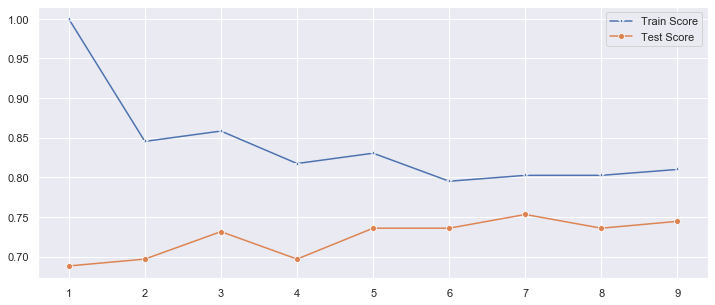

In [15]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [16]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
    
knn.score(X_test,y_test)

0.7532467532467533

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

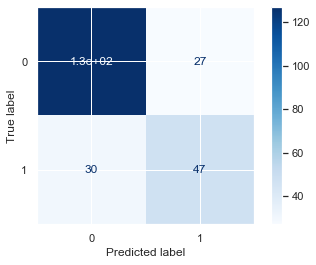

In [18]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues
)
disp

**<font color='teal'> Print the classification report </font>**

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.82      0.82       154
           1       0.64      0.61      0.62        77

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [21]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7761310584839997
Best Parameters: {'n_neighbors': 25}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [25]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'bootstrap': [True],
 'max_depth': [10, 20, 40, 80],
 'max_features': [2, 3],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 400, 600, 1000]}
rf = RandomForestRegressor()
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [26]:
rf_cv.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
#optimal number of estimators is 200